# Lab 7
## Data Structures & Algorithms
### Thursday, 4 April 2024

## Today

* [Some more Big O stuff](#bigo)
* [Simple Gradient Descent](#gradient)
* [Plotting with plotly in Flask](#plotly)
* [A dashboard to track page loads](#dashboard)
* [Exercises](#exercises)

## Some more bigO examples <a class="anchor" id="bigo"></a>

In the homework, you had to analyse an algorithm that returned the largest sum of any contiguous subarray of an input array. Let's go through this step by step first and then look at the complexity analysis.

In [4]:
def largest_sum_contiguous_subarray(array):
    max_sum = None
    for i in range(len(array)):
        sum_subarray = 0
        for j in range(i, len(array)):
            sum_subarray += array[j]
            if max_sum is None or max_sum < sum_subarray:
                max_sum = sum_subarray
    return max_sum

In [5]:
array_1 = [2]
array_2 = [-2, 3]
array_3 = [-2, 3, -2, 4, -1, -2]

print(largest_sum_contiguous_subarray(array_1))
print(largest_sum_contiguous_subarray(array_2))
print(largest_sum_contiguous_subarray(array_3))

2
3
5


### Complexity analysis

To analyse the the time complexity of the algorithm, we break it down into its loops:

* outer loop: iterates through each element of the array of size `n` - it runs `n` times
* inner loop: iterates through elements of array starting from current index `i` all the way to the end; in the worst case, this is `n` operations - we could stop here and say that it's $O(n^2)$ because of this worst-case scenario
* in more detail: for `i=0` the inner loop runs `n` times, for `i=1` the inner loop runs `n-1` times, and so on, so in total, we have $\frac{n(n+1)}{2}$ operations (triangular numbers identity) - time complexity is $O(n^2)$ (focusing on highest order term)
* within the inner-most loop: constant time operations ($O(1)$ - do not depend on size of array)

As most of you noticed in the homework, there is a more efficient way of doing this (which we will see below). However, this is already more efficient than the brute-force algorithm (aka going through every single option and checking it). This is because after calculating the sum of subarray say, from i to k, we do not have to do this again for the subarray from i to k+1. Instead, we are 'saving on operations' by storing the sum of the subarray from i to k, setting it as the new max_sum if it is, and then adding the next element to the current sum. 

### Alternative 1: higher time complexity (brute-force)

Here, we loop over all possible contiguous sub-arrays and calculate the sum.

In [6]:
def largest_sum_contiguous_subarray_bruteforce(array):
    # initialise value for largest sum
    max_sum = None
    
    # loop through start points of the subarray
    for i in range(len(array)):
        # loop through end points of the subarray
        for j in range(i, len(array)):
            # loop through the entire subarray (starting with i and ending with j)
            sum_subarray = 0
            for k in range(i, j + 1):
                sum_subarray += array[k]
            
            if max_sum is None or max_sum < sum_subarray:
                # update max_sum if the sum of the current subarray is greater than the stored global sum
                max_sum = sum_subarray
            
    return max_sum

In [7]:
array_1 = [2]
array_2 = [-2, 3]
array_3 = [-2, 3, -2, 4, -1, -2]

print(largest_sum_contiguous_subarray_bruteforce(array_1))
print(largest_sum_contiguous_subarray_bruteforce(array_2))
print(largest_sum_contiguous_subarray_bruteforce(array_3))

2
3
5


### Complexity

To analyse the the time complexity of the algorithm, we again break it down into its loops:

* first two loops: same as before
* inner loop: in the worst case (when `i=0` and `j=n-1`), this runs for `n` iterations - we stop here and notice that this is $O(n^3)$
* within the inner-most loop: constant time operations ($O(1)$ - do not depend on size of array)

### Alternative 2: lower time complexity

Now we improve the algorithm from the homework, to have an algorithm that has time complexity $O(n)$ instead of $O(n^2)$.

In [8]:
def largest_sum_contiguous_subarray_efficient(array):
    # initialise array where at each i we store the sum of the subarray ending at i
    sum_arr = [0] * len(array) 

    # the first element of sum_arr is just the first element of the array
    sum_arr[0] = array[0]

    # loop through end points
    for i in range(1, len(array)):
        # if the sum of the subarray ending at the previous element is greater than 0, we extend the subarray to include the current element
        if sum_arr[i - 1] > 0:
            sum_arr[i] = sum_arr[i - 1] + array[i]
        # otherwise, the sum at end point i is just equal to the ith element of the array
        else:
            sum_arr[i] = array[i]
      
    return max(sum_arr)

In [9]:
array_1 = [2]
array_2 = [-2, 3]
array_3 = [-2, 3, -2, 4, -1, -2]

print(largest_sum_contiguous_subarray_efficient(array_1))
print(largest_sum_contiguous_subarray_efficient(array_2))
print(largest_sum_contiguous_subarray_efficient(array_3))

2
3
5


### Complexity

Since we only have one loop that iterates through the length of the array and we have constant time operations (comparison, addition, assignment), we now have time complexity $O(n)$.

Why has space complexity increased from $O(1)$ to $O(n)$? Can we do better?

### Alternative 2: even lower time complexity

Now we improve the algorithm even more, by also lowering the space complexity. 

In [10]:
def largest_sum_contiguous_subarray_more_efficient(array):
    # initialise two max values; global_max always stores the current largest sum, local_max stores the sum of the current subarray
    global_max, local_max = array[0], array[0]

    # loop through the end points
    for i in range(1, len(array)):
        # if the current local_max is greater than 0, we add the ith element of the array, so we extend the subarray by element i
        if local_max > 0:
            local_max += array[i]
        # else, we start with a new subarray at element i
        else:
            local_max = array[i]
        # whenever the sum of the current subarray is greater than the one that was previously stored, update the global max value
        if global_max < local_max:
            global_max = local_max
            
    return global_max

In [11]:
array_1 = [2]
array_2 = [-2, 3]
array_3 = [-2, 3, -2, 4, -1, -2]

print(largest_sum_contiguous_subarray_more_efficient(array_1))
print(largest_sum_contiguous_subarray_more_efficient(array_2))
print(largest_sum_contiguous_subarray_more_efficient(array_3))

2
3
5


### Complexity

We are again only looping through the input array of length `n` once, and we have constant time operations (comparison, addition, assignment), so the time complexity remains $O(n)$.

The space that is used as we are looping through the input array now does not depend on it's size anymore, so it is constant ($O(1)$).

## Simple Gradient Descent <a class="anchor" id="gradient"></a>

From https://induraj2020.medium.com/implementing-gradient-descent-in-python-d1c6aeb9a448

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to be minimized (a simple quadratic function)
def f(x, y):
    return x**2 + y**2

# Define the partial derivatives of the function with respect to x and y
def df_dx(x, y):
    return 2 * x

def df_dy(x, y):
    return 2 * y

# Define the gradient descent algorithm
def gradient_descent(start_x, start_y, learning_rate, num_iterations):
    # Initialize the parameters
    x = start_x
    y = start_y
    history = []
    
    # Perform the gradient descent iterations
    for i in range(num_iterations):
        # Calculate the gradients
        grad_x = df_dx(x, y)
        grad_y = df_dy(x, y)
        
        # Update the parameters
        x = x - learning_rate * grad_x
        y = y - learning_rate * grad_y
        
        # Save the history of the parameters
        history.append((x, y, f(x, y)))
    
    return x, y, f(x, y), history

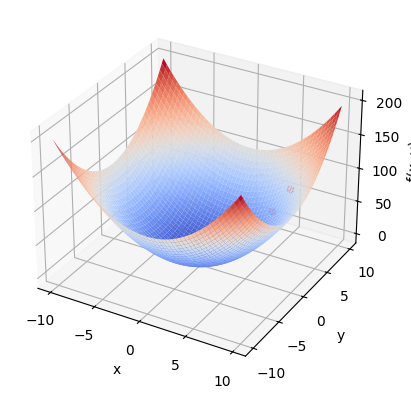

In [14]:
# Define the meshgrid for plotting the function
x_range = np.arange(-10, 10, 0.1)
y_range = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

# Perform gradient descent and plot the results
start_x, start_y = 8, 8
learning_rate = 0.1
num_iterations = 20
x_opt, y_opt, f_opt, history = gradient_descent(start_x, start_y, learning_rate, num_iterations)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.scatter(*zip(*history), c='r', marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()

## Plotly visualisation with flask apps  <a class="anchor" id="plotly"></a>

Plotly is an interactive plotting library - you can include things like buttons, sliders, dropdowns. It can be easily integrated with flask. Let's first create a simple bar chart as an example (example taken from [here](https://towardsdatascience.com/web-visualization-with-plotly-and-flask-3660abf9c946)). You can either add this dashboard page to your own personal flask app (for which you have created your about page) or you can clone [this](https://github.com/lenafm/my_flask_app) repo.

**Steps**

1. First, create a new html template in your templates folder, called `dashboard.html` and add the following content:

```html
{% extends "layout.html" %}
{% block content %}
    <h1>{{ title }}</h1>
    <div id='chart' class='chart'></div>
    <script src='https://cdn.plot.ly/plotly-latest.min.js'></script>
    <script type='text/javascript'>
        var graphs = {{graphJSON | safe}};
        Plotly.plot('chart',graphs,{});
    </script>
{% endblock %}
```

2. Install the `plotly` and `pandas` package to the virtual environment you use to run flask apps.
3. At the top of your `routes.py` file, import the necessary packages as follow:

```python
import pandas as pd
import json
import plotly
import plotly.express as px
```

4. Create a new route to your `routes.py` file, that will display the dashboard html, when the user goes to `/dashboard`. (This is where we will display the dynamic plotly graphs later, which will update for user page loads).

```python
@app.route('/dashboard')
def dashboard():
    df = pd.DataFrame({
        'Fruit': ['Apples', 'Oranges', 'Bananas', 'Apples', 'Oranges',
                  'Bananas'],
        'Amount': [4, 1, 2, 2, 4, 5],
        'City': ['SF', 'SF', 'SF', 'Montreal', 'Montreal', 'Montreal']
    })
    fig = px.bar(df, x='Fruit', y='Amount', color='City',
                 barmode='group')
    graphJSON = json.dumps(fig, cls=plotly.utils.PlotlyJSONEncoder)
    return render_template('dashboard.html', title='My plot', graphJSON=graphJSON)
```

## Creating a dashboard to track page loads <a class="anchor" id="dashboard"></a>

We now create a dashboard for tracking the data for page loads (code adapted from [here](https://python.plainenglish.io/track-website-usage-with-postgresql-and-flask-53f583249911)).

1. First, we create two new database models (aka tables). One will have the total number of page views per day and the other will save the users' IP addresses and the dates on which they visited. In your `models.py` file, add:

```python
class Day(db.Model):
    # __tablename__ = 'day' # if you wanted to, you could change the default table name here
    id = db.Column(db.Date, primary_key=True)
    views = db.Column(db.Integer)

    def __repr__(self):
        return f"Day('{self.id}', '{self.views}')"


class IpView(db.Model):
    ip = db.Column(db.String(20), primary_key=True)
    date_id = db.Column(db.Date, db.ForeignKey('day.id'), primary_key=True)

    def __repr__(self):
        return f"IpView('{self.ip}', '{self.date_id}')"
```

2. Now, we create our database structure. To do this, we need to run the `db.create_all()` command. Normally, this is all we have to do. Here, we also create our default user, since for now we are only adding blog posts ourselves).
```python
from flaskapp import db
from flaskapp.models import User
db.create_all()
user = User(name='Default user')
db.session.add(user)
db.session.commit()
```

3. Now, we need to create a part in our `routes.py` file that saves data to these tables, the moment a user loads a page:

```python
@app.before_request
def before_request_func():
    day_id = get_current_day()  # get our day_id, which is the date string in the format "yyyy-mm-dd"
    client_ip = request.remote_addr  # get the ip address of where the client request came from

    query = Day.query.filter_by(id=day_id)  # try to get the row associated to the current day
    if query.count() > 0:
        # the current day is already in table, simply increment its views
        current_day = query.first()
        current_day.views += 1
    else:
        # the current day does not exist, it's the first view for the day.
        current_day = Day(id=day_id, views=1)
        db.session.add(current_day)  # insert a new day into the day table

    query = IpView.query.filter_by(ip=client_ip, date_id=day_id)
    if query.count() == 0:  # check if it's the first time a viewer from this ip address is viewing the website
        ip_view = IpView(ip=client_ip, date_id=day_id)
        db.session.add(ip_view)  # insert into the ip_view table

    db.session.commit()  # commit all the changes to the database
```

4. We also temporarily update our dashboard route, to display the data that is currently in the `day` table:

```python
# Route to the dashboard page
@app.route('/dashboard')
def dashboard():
    days = Day.query.all()
    return [{'Date': day.id, 'Page views': day.views} for day in days]
```

5. Let's add some fake page views to our database by opening your python shell and manually adding some data to the database:

```python
from flaskapp import db
from flaskapp.models import User, Day, IpView
import datetime
day1 = Day(id=datetime.date(2024,3,31),views=10)
day2 = Day(id=datetime.date(2024,4,1),views=12)
day3 = Day(id=datetime.date(2024,4,2),views=13)
db.session.add(day1)
db.session.add(day2)
db.session.add(day3)
ipview1 = IpView(ip='127.0.0.1', date_id=day1.id)
ipview2 = IpView(ip='127.0.0.1', date_id=day2.id)
ipview3 = IpView(ip='127.0.0.1', date_id=day3.id)
db.session.add(ipview1)
db.session.add(ipview2)
db.session.add(ipview3)
db.session.commit()
```

6. Now, we will update our dashboard route again, to display the page load data as a plotly bar chart:

```python
# Route to the dashboard page
@app.route('/dashboard')
def dashboard():
    days = Day.query.all()
    df = pd.DataFrame([{'Date': day.id, 'Page views': day.views} for day in days])

    fig = px.bar(df, x='Date', y='Page views')

    graphJSON = json.dumps(fig, cls=plotly.utils.PlotlyJSONEncoder)
    return render_template('dashboard.html', title='Page views per day', graphJSON=graphJSON)
```

## Exercises <a class="anchor" id="exercises"></a>

### Exercise 1

Implement the page with the plotly bar chart from the [first example](#plotly).

### Exercise 2

Implement the dashboard for tracking page loads from the [second example](#dashboard).

### Exercise 3

Create another page for your website, that gives you information about your blog posts in table format. Specifically, the table should include at least two columns: the date and the number of posts that were published on that date. 

Hint: You'll have to create another template file (e.g. `blog_dashboard.html`) and create an HTML table. You'll first have to research how to create tables in HTML. In your `routes.py` file, you'll need a new route which passes metadata about the blogs to the new template file.